In [1]:
import pandas as pd    #importing necessary libraries
import numpy as np

In [2]:
import os
os.chdir(r'/Users/apple/Documents/GitHub/Prediction-of-Stock-Price-Movement-based-on-trading-DS-II/Datasets')

In [3]:
data = pd.read_csv('DataFrame.csv')      #Reading csv file and creating DataFrame
print(data.shape)
data.head()

(22805, 8)


,Type,Date,Time,open,high,low,close,Unnamed: 7
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,NaN
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,NaN
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,NaN
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,NaN
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,NaN


In [4]:
data.drop('Unnamed: 7' , axis = 1 , inplace = True)   #Dropping unnecessary Column:-> Unnamed: 7

In [5]:
data.rename(columns = str.upper , inplace = True)

In [6]:
data

,TYPE,DATE,TIME,OPEN,HIGH,LOW,CLOSE
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45
...,...,...,...,...,...,...,...
22800,NIFTY,20210331,15:27,14687.35,14694.35,14686.30,14690.60
22801,NIFTY,20210331,15:28,14690.90,14690.90,14686.05,14689.30
22802,NIFTY,20210331,15:29,14690.30,14694.10,14688.55,14691.30
22803,NIFTY,20210331,15:30,14689.85,14693.55,14689.45,14693.05


# CONVERTING STRING INTO DATE TIME SERIES

In [7]:
import datetime
data['DATE'] = pd.to_datetime(data['DATE'] , format = "%Y%m%d")

In [8]:
data.head()

,TYPE,DATE,TIME,OPEN,HIGH,LOW,CLOSE
0,NIFTY,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15
1,NIFTY,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05
2,NIFTY,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70
3,NIFTY,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20
4,NIFTY,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45


In [9]:
data.describe()   #Statistics of the Dataset

,OPEN,HIGH,LOW,CLOSE
count,22805.000000,22805.000000,22805.000000,22805.000000
mean,14703.322396,14707.486481,14699.102201,14703.260816
std,391.377498,391.265231,391.551643,391.366248
min,13604.750000,13614.400000,13596.750000,13602.800000
25%,14462.250000,14465.950000,14458.050000,14461.950000
50%,14739.500000,14743.000000,14735.850000,14739.450000
75%,15037.000000,15041.250000,15032.500000,15036.850000
max,15429.500000,15431.750000,15427.900000,15430.200000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   TYPE    22805 non-null  object        
 1   DATE    22805 non-null  datetime64[ns]
 2   TIME    22805 non-null  object        
 3   OPEN    22805 non-null  float64       
 4   HIGH    22805 non-null  float64       
 5   LOW     22805 non-null  float64       
 6   CLOSE   22805 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.2+ MB


In [11]:
data[data.duplicated()]       #Checking for the duplicated entries

,TYPE,DATE,TIME,OPEN,HIGH,LOW,CLOSE


# CONSIDERING ANOTHER DATASET

In [12]:
df2 = pd.read_csv('MSFT.csv')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [13]:
msft=df2.copy()

In [14]:
df2.rename(columns = str.upper , inplace = True)

In [15]:
df2['DATE'] = pd.to_datetime(df2['DATE'] , format = "%Y-%m-%d")

In [16]:
df2.head()

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [17]:
df2[df2.duplicated()]

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME


In [18]:
df2.describe()

,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME
count,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
mean,34.831233,35.209355,34.449657,34.840895,29.886536,5.953411e+07
std,44.060163,44.513443,43.597704,44.080986,44.195101,3.858121e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07
max,261.660004,263.190002,260.170013,261.970001,261.970001,1.031789e+09


In [19]:
df2.isna().sum()

DATE         0
OPEN         0
HIGH         0
LOW          0
CLOSE        0
ADJ CLOSE    0
VOLUME       0
dtype: int64

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       8857 non-null   datetime64[ns]
 1   OPEN       8857 non-null   float64       
 2   HIGH       8857 non-null   float64       
 3   LOW        8857 non-null   float64       
 4   CLOSE      8857 non-null   float64       
 5   ADJ CLOSE  8857 non-null   float64       
 6   VOLUME     8857 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 484.5 KB


In [21]:
#df2.value_counts()

# EDA ANALYSIS (DataFrame.csv)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
d1 = data.copy()
d1

,TYPE,DATE,TIME,OPEN,HIGH,LOW,CLOSE
0,NIFTY,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15
1,NIFTY,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05
2,NIFTY,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70
3,NIFTY,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20
4,NIFTY,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45
...,...,...,...,...,...,...,...
22800,NIFTY,2021-03-31,15:27,14687.35,14694.35,14686.30,14690.60
22801,NIFTY,2021-03-31,15:28,14690.90,14690.90,14686.05,14689.30
22802,NIFTY,2021-03-31,15:29,14690.30,14694.10,14688.55,14691.30
22803,NIFTY,2021-03-31,15:30,14689.85,14693.55,14689.45,14693.05


In [24]:
d1.columns
d1 = d1.set_index(['TYPE','DATE','TIME'])

In [25]:
feature = ['OPEN', 'HIGH', 'LOW', 'CLOSE']

In [26]:
list(enumerate(feature))

[(0, 'OPEN'), (1, 'HIGH'), (2, 'LOW'), (3, 'CLOSE')]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


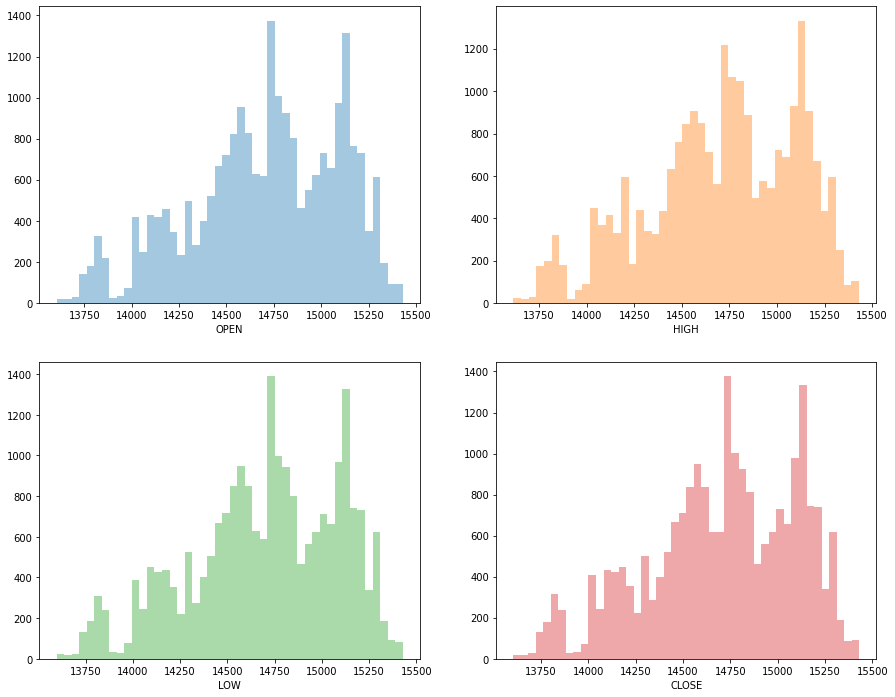

In [27]:
plt.figure(figsize=(15,12))
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.distplot(x = d1[i[1]] , kde = False , color = base_color)
    plt.xlabel(i[1]);

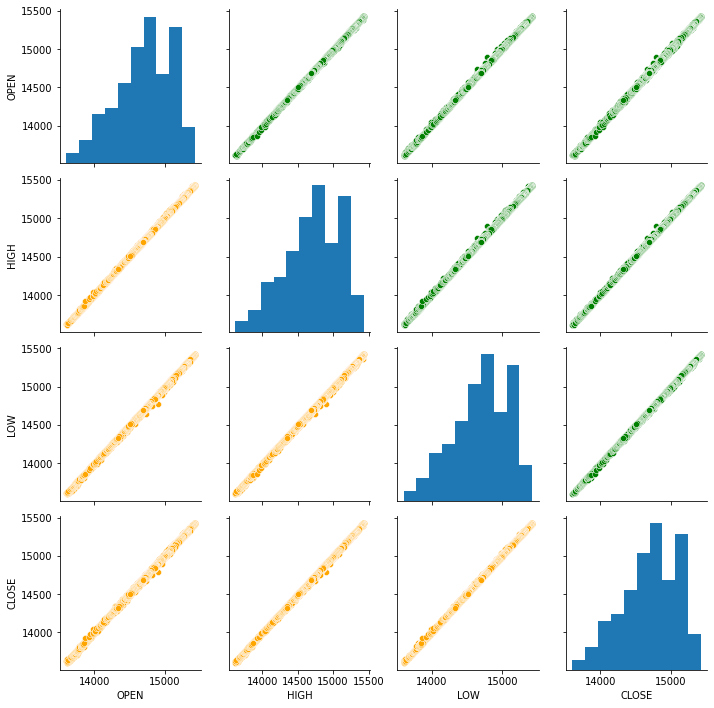

In [28]:
color = sns.PairGrid(d1)
color.map_upper(sns.scatterplot,color = 'green')
color.map_lower(sns.scatterplot,color = 'orange')
color.map_diag(plt.hist)

Text(0.5, 0, 'DATE')

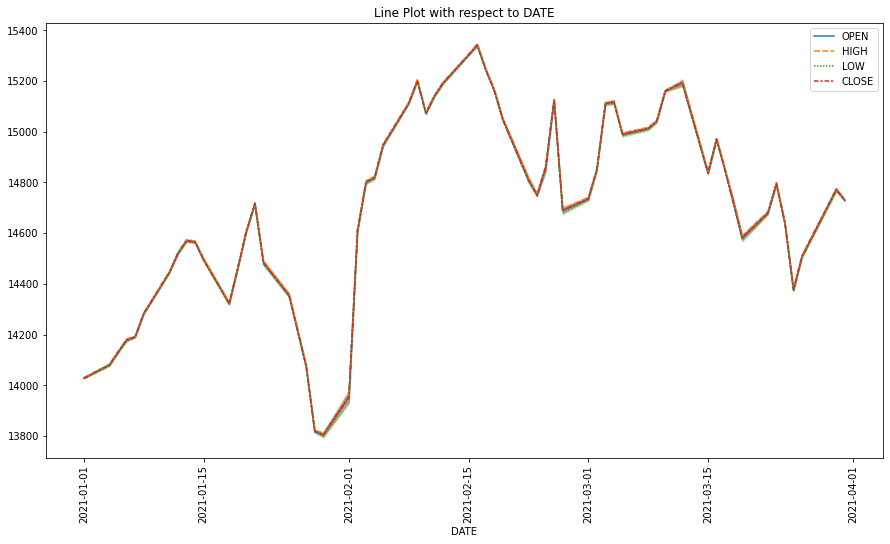

In [29]:
d1 = d1.reset_index()                  # line plot w.r.t DATE
d1 = d1.set_index('DATE')
plt.figure(figsize=(15,8))
sns.lineplot(data = d1)
plt.xticks(rotation = 90)
plt.title('Line Plot with respect to DATE')
plt.xlabel("DATE")


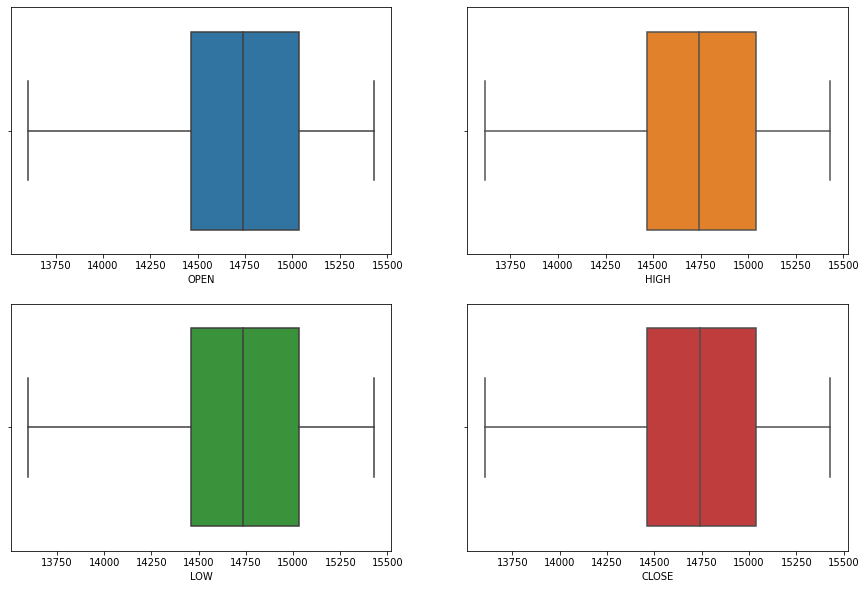

In [30]:
plt.figure(figsize=(15,10))         #creating Box plots of various attributes
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.boxplot(x = d1[i[1]] , color = base_color)
    plt.xlabel(i[1]);

<AxesSubplot:>

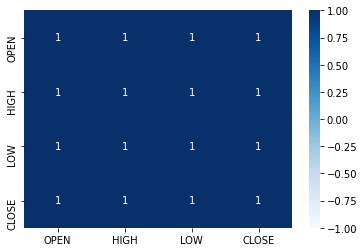

In [31]:
sns.heatmap(d1.corr() , vmin = -1 , vmax = 1 , annot = True , cmap = 'Blues')     #heat map to determine correlation

# EDA ANALYSIS (MSFT.csv)

In [32]:
d2 = df2.copy()
d2

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400
...,...,...,...,...,...,...,...
8852,2021-04-27,261.579987,263.190002,260.119995,261.970001,261.970001,31014200
8853,2021-04-28,256.079987,256.540009,252.949997,254.559998,254.559998,46903100
8854,2021-04-29,255.460007,256.100006,249.000000,252.509995,252.509995,40589000
8855,2021-04-30,249.740005,253.080002,249.600006,252.179993,252.179993,30929200


In [33]:
d2 = d2.set_index('DATE')

In [34]:
feat = d2.columns

In [35]:
list(enumerate(feat))

[(0, 'OPEN'),
 (1, 'HIGH'),
 (2, 'LOW'),
 (3, 'CLOSE'),
 (4, 'ADJ CLOSE'),
 (5, 'VOLUME')]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

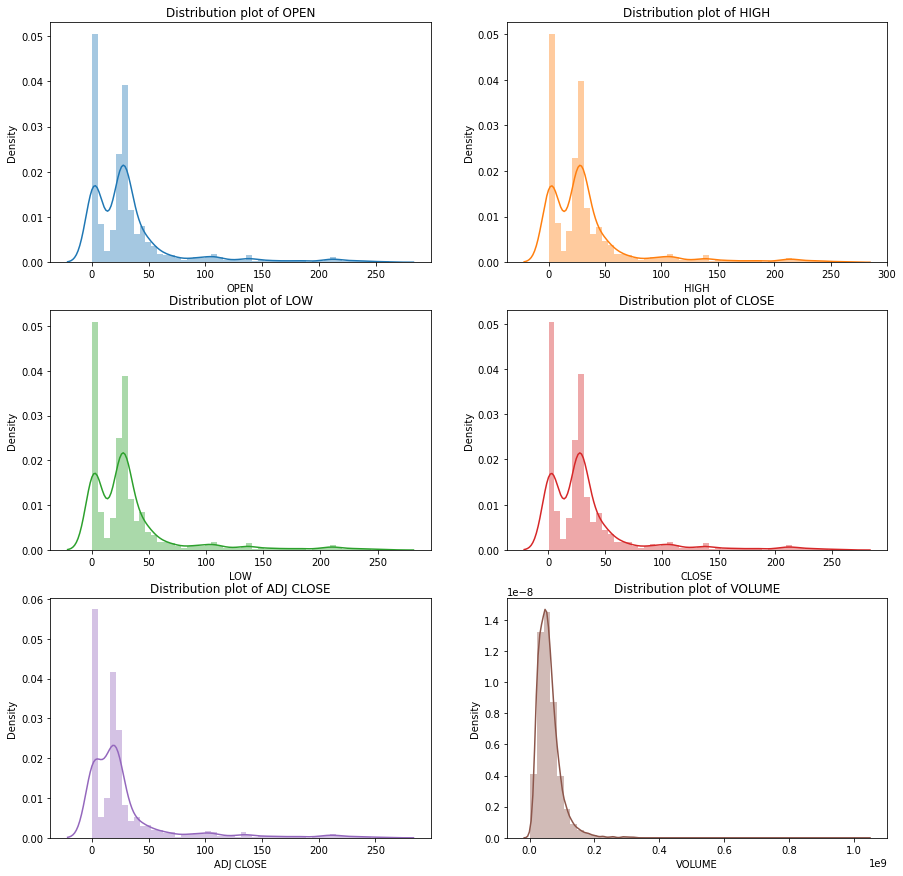

In [36]:
plt.figure(figsize=(15,15))         #creating distribution plots of various attributes
for i in enumerate(feat):
    plt.subplot(3,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.distplot(x = d2[i[1]] , color = base_color)
    plt.xlabel(i[1]);
    plt.title(f'Distribution plot of {i[1]}')

In [37]:
#plt.figure(figsize=(15,10))    #plot of line plot btwn Date and various other attributes
#d2 = d2.set_index('DATE')
#sns.lineplot(data = d2)

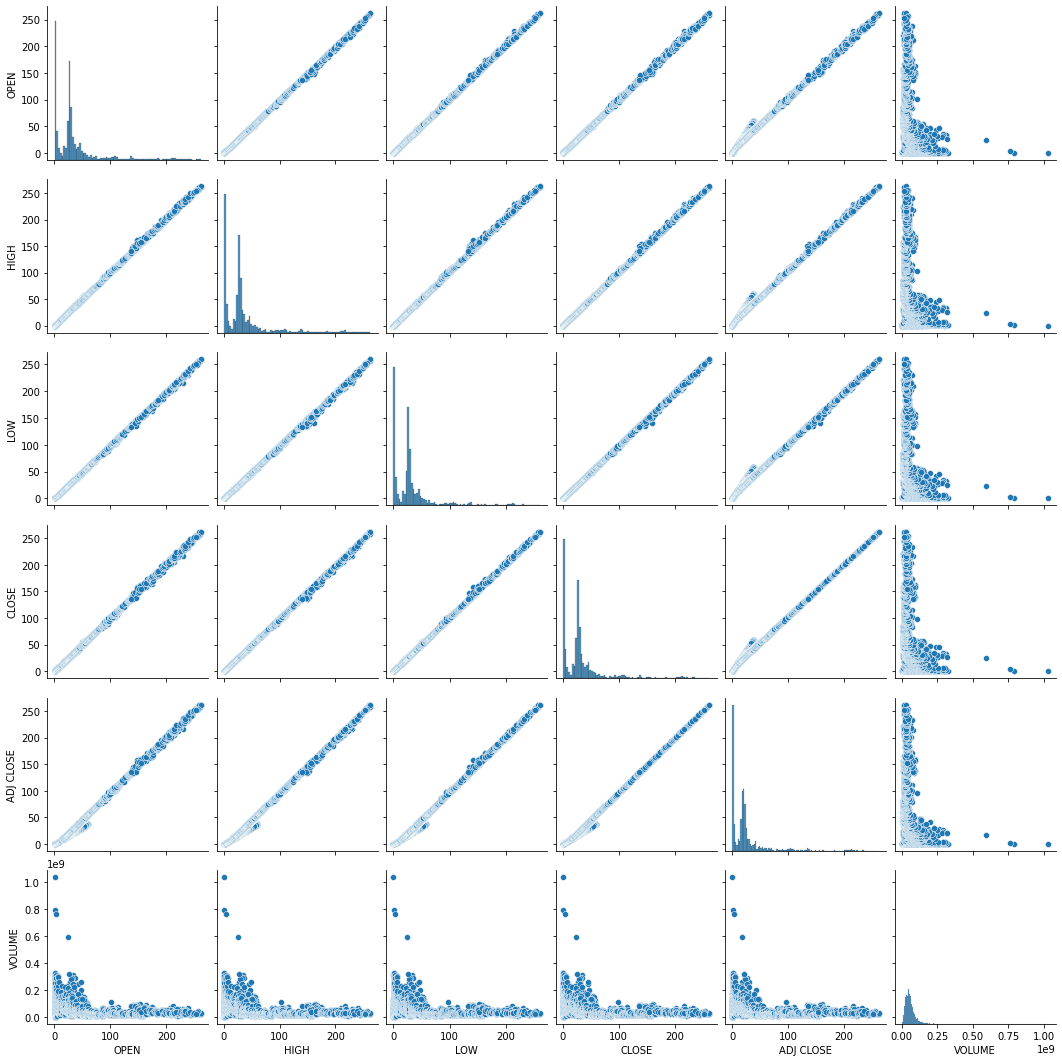

In [38]:
sns.pairplot(data = d2)      #Plots b/w various attributes

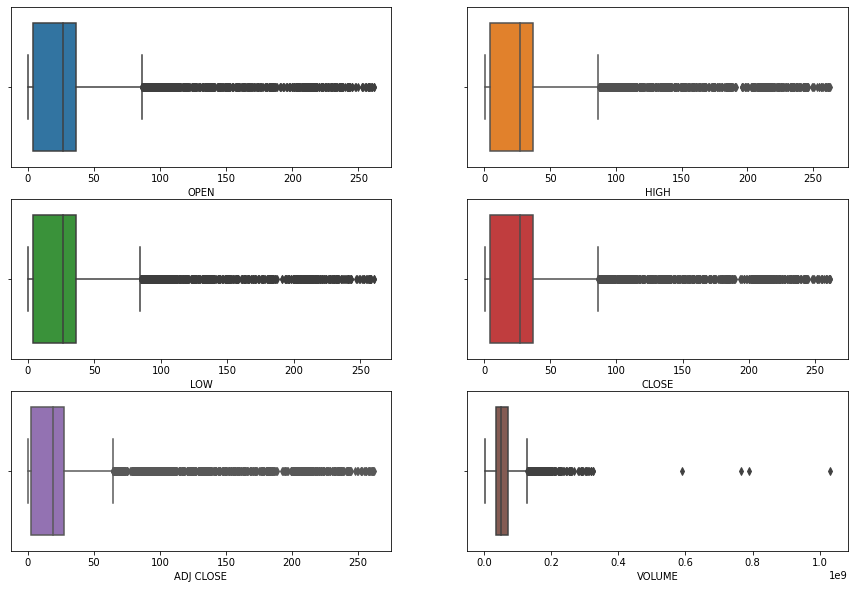

In [39]:
plt.figure(figsize=(15,10))         #creating Box plots of various attributes
for i in enumerate(feat):
    plt.subplot(3,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.boxplot(x = d2[i[1]] , color = base_color)
    plt.xlabel(i[1]);

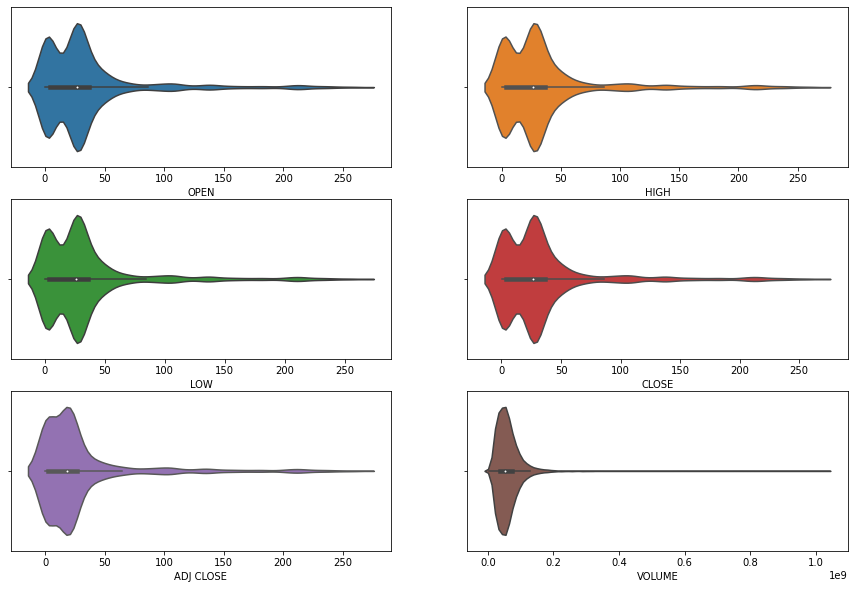

In [40]:
plt.figure(figsize=(15,10))         #creating Violin plots of various attributes
for i in enumerate(feat):
    plt.subplot(3,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.violinplot(x = d2[i[1]] , color = base_color)
    plt.xlabel(i[1]);

<AxesSubplot:>

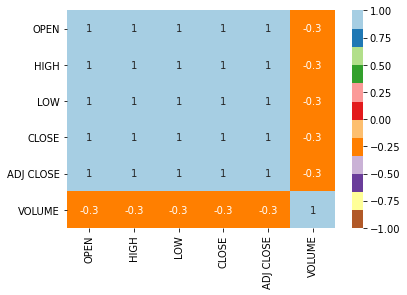

In [41]:
sns.heatmap(d2.corr() , vmin = -1 , vmax = 1 , annot = True , cmap = 'Paired_r')     #heat map to determine correlation

# AS SEEN THE PRESENCE OF OUTLIERS IN MSFT, SO SUPRESSING THEIR EFFECT

In [42]:
iqr1 = d2['OPEN'].quantile(0.75) - d2['OPEN'].quantile(0.25) 
iqr1

32.88624954223633

In [43]:
upper_whisker = d2['OPEN'].quantile(0.75)+(iqr1*1.5)
lower_whisker = d2['OPEN'].quantile(0.25)-(iqr1*1.5)
print(upper_whisker)
print(lower_whisker)

86.05937385559082
-45.48562431335449


In [44]:
iqr2 = d2['CLOSE'].quantile(0.75) - d2['CLOSE'].quantile(0.25) 
iqr2

32.80843687057495

In [45]:
upper_whisker = d2['CLOSE'].quantile(0.75)+(iqr2*1.5)
lower_whisker = d2['CLOSE'].quantile(0.25)-(iqr2*1.5)
print(upper_whisker)
print(lower_whisker)

85.87265515327454
-45.36109232902527


In [46]:
iqr3 = d2['HIGH'].quantile(0.75) - d2['HIGH'].quantile(0.25) 
iqr3

33.125

In [47]:
upper_whisker = d2['HIGH'].quantile(0.75)+(iqr3*1.5)
lower_whisker = d2['HIGH'].quantile(0.25)-(iqr3*1.5)
print(upper_whisker)
print(lower_whisker)

86.6875
-45.8125


In [48]:
iqr4 = d2['LOW'].quantile(0.75) - d2['LOW'].quantile(0.25) 
iqr4

32.29750061035156

In [49]:
upper_whisker = d2['LOW'].quantile(0.75)+(iqr4*1.5)
lower_whisker = d2['LOW'].quantile(0.25)-(iqr4*1.5)
print(upper_whisker)
print(lower_whisker)

84.5562515258789
-44.633750915527344


In [50]:
iqr5 = d2['ADJ CLOSE'].quantile(0.75) - d2['ADJ CLOSE'].quantile(0.25) 
iqr5

24.771977186203003

In [51]:
upper_whisker = d2['ADJ CLOSE'].quantile(0.75)+(iqr5*1.5)
lower_whisker = d2['ADJ CLOSE'].quantile(0.25)-(iqr5*1.5)
print(upper_whisker)
print(lower_whisker)

64.37626564502716
-34.71164309978485


In [52]:
iqr6 = d2['VOLUME'].quantile(0.75) - d2['VOLUME'].quantile(0.25) 
iqr6

37798000.0

In [53]:
upper_whisker = d2['VOLUME'].quantile(0.75)+(iqr6*1.5)
lower_whisker = d2['VOLUME'].quantile(0.25)-(iqr6*1.5)
print(upper_whisker)
print(lower_whisker)

130092200.0
-21099800.0


In [54]:
d2.loc[d2['OPEN'] >= 86.05937385559082 , 'OPEN'] = 86.05937385559082
d2.loc[d2['CLOSE'] >= 85.87265515327454 , 'CLOSE'] = 85.87265515327454
d2.loc[d2['HIGH'] >= 86.6875 , 'HIGH'] = 86.6875
d2.loc[d2['LOW'] >= 84.5562515258789 , 'LOW'] = 84.5562515258789
d2.loc[d2['ADJ CLOSE'] >= 64.37626564502716 , 'ADJ CLOSE'] = 64.37626564502716
d2.loc[d2['VOLUME'] >= 130092200.0 , 'VOLUME'] = 130092200.0

In [55]:
d2.describe()

,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME
count,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
mean,28.668768,28.957282,28.299462,28.656075,21.736316,5.753293e+07
std,25.343716,25.530864,24.964792,25.305929,20.154263,2.896535e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07
max,86.059374,86.687500,84.556252,85.872655,64.376266,1.300922e+08


In [56]:
l = ['OPEN' , 'HIGH' , 'LOW' , 'CLOSE' , 'ADJ CLOSE' , 'VOLUME']
list(enumerate(l))

[(0, 'OPEN'),
 (1, 'HIGH'),
 (2, 'LOW'),
 (3, 'CLOSE'),
 (4, 'ADJ CLOSE'),
 (5, 'VOLUME')]

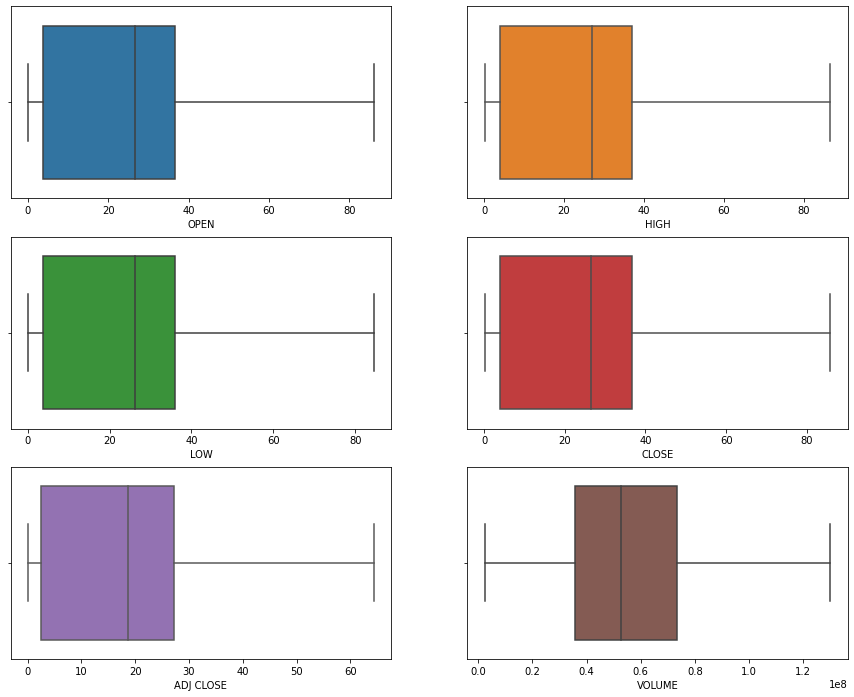

In [57]:
plt.figure(figsize=(15,12))#creating Box plots of various columns after removing outliers
for i in enumerate(l):
    plt.subplot(3,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.boxplot(x = d2[i[1]] , color = base_color)
    plt.xlabel(i[1]);

In [58]:
data.columns

Index(['TYPE', 'DATE', 'TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE'], dtype='object')

In [59]:
data['TYPE'].value_counts()

NIFTY    22805
Name: TYPE, dtype: int64

In [60]:
data.drop(['TYPE'],axis=1,inplace=True)

In [61]:
data.head()

,DATE,TIME,OPEN,HIGH,LOW,CLOSE
0,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15
1,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05
2,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70
3,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20
4,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45


In [62]:
data['DAY']=pd.to_datetime(data.DATE, format="%Y/%m/%d").dt.day

In [63]:
data['month']=pd.to_datetime(data['DATE'], format='%Y/%m/%d').dt.month

In [64]:
data['YEAR']=pd.to_datetime(data['DATE'], format='%Y/%m/%d').dt.year

In [65]:
data.drop(['DATE'],axis=1,inplace=True)

In [66]:
data['Time_hour']=pd.to_datetime(data['TIME']).dt.hour

In [67]:
data['time_minute']=pd.to_datetime(data['TIME']).dt.minute


In [68]:
data.drop(['TIME'],axis=1,inplace=True)

In [69]:
data.head()

,OPEN,HIGH,LOW,CLOSE,DAY,month,YEAR,Time_hour,time_minute
0,13997.90,14020.85,13991.35,14013.15,1,1,2021,9,16
1,14014.85,14018.55,14008.15,14009.05,1,1,2021,9,17
2,14008.05,14013.10,14005.05,14012.70,1,1,2021,9,18
3,14013.65,14019.10,14013.65,14016.20,1,1,2021,9,19
4,14015.45,14017.80,14011.95,14015.45,1,1,2021,9,20


# MSFT

In [70]:
df2['DAY']=pd.to_datetime(df2.DATE, format="%Y/%m/%d").dt.day

df2['month']=pd.to_datetime(df2['DATE'], format='%Y/%m/%d').dt.month

df2['YEAR']=pd.to_datetime(df2['DATE'], format='%Y/%m/%d').dt.year

In [71]:
df2.drop(['DATE'],axis=1,inplace=True)

In [72]:
df2.head()

,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME,DAY,month,YEAR
0,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,13,3,1986
1,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,14,3,1986
2,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,17,3,1986
3,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,18,3,1986
4,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,19,3,1986


# DATAFRAME MODEL

In [73]:
X = data.loc[:,data.columns!="CLOSE"]

In [74]:
data.columns

Index(['OPEN', 'HIGH', 'LOW', 'CLOSE', 'DAY', 'month', 'YEAR', 'Time_hour',
       'time_minute'],
      dtype='object')

In [75]:
#X.value_counts()

In [76]:
X.head()

,OPEN,HIGH,LOW,DAY,month,YEAR,Time_hour,time_minute
0,13997.90,14020.85,13991.35,1,1,2021,9,16
1,14014.85,14018.55,14008.15,1,1,2021,9,17
2,14008.05,14013.10,14005.05,1,1,2021,9,18
3,14013.65,14019.10,14013.65,1,1,2021,9,19
4,14015.45,14017.80,14011.95,1,1,2021,9,20


In [77]:
y=data['CLOSE']

In [78]:
y.head()

0    14013.15
1    14009.05
2    14012.70
3    14016.20
4    14015.45
Name: CLOSE, dtype: float64

# TEST TRAIN SPLIT DATAFRAME

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [81]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(18244, 8) (4561, 8) (18244,) (4561,)


# Standardizing Data

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
sc = StandardScaler().fit(X_train)

In [84]:
X_train_std=sc.transform(X_train)

In [85]:
X_test_std=sc.transform(X_test)

In [86]:
X_train_std

array([[ 1.05314965,  1.04448231,  1.04056985, ...,  0.        ,
         0.57862783,  1.57763269],
       [ 1.11093268,  1.12650169,  1.11958297, ...,  0.        ,
        -1.03034734, -1.47114428],
       [-2.22510865, -2.15991211, -2.28835392, ...,  0.        ,
        -1.5666724 , -0.76758037],
       ...,
       [ 1.20151495,  1.22261814,  1.21178628, ...,  0.        ,
        -1.5666724 ,  0.52228681],
       [ 1.07569912,  1.06575609,  1.06528546, ...,  0.        ,
         0.04230277,  1.57763269],
       [-0.57515319, -0.57860421, -0.56504839, ...,  0.        ,
        -1.03034734,  0.87406877]])

In [87]:
X_test_std

array([[ 0.42509547,  0.41780303,  0.41128224, ...,  0.        ,
        -1.03034734, -0.82621069],
       [ 1.34834279,  1.35589962,  1.35854322, ...,  0.        ,
         0.57862783, -0.35716808],
       [-0.69059114, -0.68240998, -0.68209537, ...,  0.        ,
        -1.03034734, -1.2952533 ],
       ...,
       [ 1.13463525,  1.12944926,  1.13981647, ...,  0.        ,
        -0.49402229, -1.41251396],
       [-1.69532407, -1.70047546, -1.6867273 , ...,  0.        ,
         1.11495288,  0.9326991 ],
       [-1.11531566, -1.11621557, -1.10815152, ...,  0.        ,
         0.57862783,  0.9326991 ]])

In [88]:
from sklearn.svm import SVR
svr=SVR(kernel='poly',degree=3,C=100,coef0=1)

In [89]:
svr.fit(X_train_std,y_train)

SVR(C=100, coef0=1, kernel='poly')

In [90]:
y_test_pred=svr.predict(X_test_std)

In [91]:
y_train_pred=svr.predict(X_train_std)

In [92]:
y_test_pred

array([14864.29115551, 15236.70494189, 14440.2064023 , ...,
       15147.8011229 , 14044.22103228, 14271.64610771])

In [93]:
y_train_pred

array([15108.47972806, 15146.49787682, 13838.45094957, ...,
       15184.00059249, 15117.92916152, 14482.25595332])

In [94]:
from sklearn.metrics import mean_squared_error,r2_score

In [95]:
mean_squared_error(y_test, y_test_pred)

7.338761384878349

In [96]:
r2_score(y_test, y_test_pred)

0.9999531217589097

# MSFT MODEL WITHOUT OUTLIER

In [97]:
df2.head()

,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME,DAY,month,YEAR
0,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,13,3,1986
1,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,14,3,1986
2,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,17,3,1986
3,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,18,3,1986
4,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,19,3,1986


In [98]:
X1=df2.loc[:,df2.columns!='CLOSE']

In [99]:
X1.head()

,OPEN,HIGH,LOW,ADJ CLOSE,VOLUME,DAY,month,YEAR
0,0.088542,0.101563,0.088542,0.061751,1031788800,13,3,1986
1,0.097222,0.102431,0.097222,0.063956,308160000,14,3,1986
2,0.100694,0.103299,0.100694,0.065059,133171200,17,3,1986
3,0.102431,0.103299,0.098958,0.063405,67766400,18,3,1986
4,0.099826,0.100694,0.097222,0.062302,47894400,19,3,1986


In [100]:
y1=df2['CLOSE']

In [101]:
y1.head()

0    0.097222
1    0.100694
2    0.102431
3    0.099826
4    0.098090
Name: CLOSE, dtype: float64

In [102]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=0)

In [103]:
print(X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape)

(7085, 8) (1772, 8) (7085,) (1772,)


In [104]:
sc1=StandardScaler().fit(X1_train)

In [105]:
X1_train_std=sc1.transform(X1_train)

In [106]:
X1_test_std=sc1.transform(X1_test)

In [107]:
X1_train_std

array([[-0.10197221, -0.10840858, -0.10376951, ...,  0.70880399,
        -1.02544085, -0.12267646],
       [ 0.24038047,  0.23429234,  0.17641548, ..., -1.3443867 ,
        -0.73464481, -0.31974318],
       [-0.22056844, -0.21923667, -0.21621761, ..., -0.08965905,
         0.42853938,  0.76412375],
       ...,
       [-0.21697802, -0.22301238, -0.21712442, ..., -0.08965905,
        -0.15305271,  0.17292361],
       [ 0.10994705,  0.12532433,  0.11265334, ..., -0.6599898 ,
        -1.3162369 , -0.41827654],
       [-0.55133637, -0.55346999, -0.5525983 , ...,  1.73539934,
         1.59172357, -0.71387661]])

In [108]:
svm1=SVR(kernel='poly',degree=3,C=100,coef0=1)

In [109]:
svm1.fit(X1_train_std,y1_train)

SVR(C=100, coef0=1, kernel='poly')

In [110]:
y1_train_pred=svm1.predict(X1_train_std)

In [111]:
Y1_test_pred=svm1.predict(X1_test_std)

In [112]:
mean_squared_error(y1_test, Y1_test_pred)

0.02974055972788323

In [113]:
r2_score(y1_test, Y1_test_pred)

0.9999831003842727

# MSFT WITH OUTLIER

In [114]:
msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [115]:
msft['DAY']=pd.to_datetime(msft.Date, format="%Y/%m/%d").dt.day

msft['month']=pd.to_datetime(msft['Date'], format='%Y/%m/%d').dt.month

msft['YEAR']=pd.to_datetime(msft['Date'], format='%Y/%m/%d').dt.year

In [116]:
msft.drop(['Date'],axis=1,inplace=True)

In [117]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume,DAY,month,YEAR
0,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,13,3,1986
1,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,14,3,1986
2,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,17,3,1986
3,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,18,3,1986
4,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,19,3,1986


In [118]:
X2=msft.loc[:,msft.columns!='Close']

In [119]:
y2=msft['Close']

In [120]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2,random_state=0)

In [121]:
print(X2_train.shape,X2_test.shape,y2_train.shape,y2_test.shape)

(7085, 8) (1772, 8) (7085,) (1772,)


In [122]:
sc2=StandardScaler().fit(X2_train)

In [123]:
X2_train_std=sc2.transform(X2_train)

In [124]:
X2_test_std=sc2.transform(X2_test)

In [125]:
X2_train_std

array([[-0.10197221, -0.10840858, -0.10376951, ...,  0.70880399,
        -1.02544085, -0.12267646],
       [ 0.24038047,  0.23429234,  0.17641548, ..., -1.3443867 ,
        -0.73464481, -0.31974318],
       [-0.22056844, -0.21923667, -0.21621761, ..., -0.08965905,
         0.42853938,  0.76412375],
       ...,
       [-0.21697802, -0.22301238, -0.21712442, ..., -0.08965905,
        -0.15305271,  0.17292361],
       [ 0.10994705,  0.12532433,  0.11265334, ..., -0.6599898 ,
        -1.3162369 , -0.41827654],
       [-0.55133637, -0.55346999, -0.5525983 , ...,  1.73539934,
         1.59172357, -0.71387661]])

In [126]:
svm2=SVR(kernel='poly',degree=3,C=100,coef0=1)

In [127]:
svm2.fit(X2_train_std,y2_train)

SVR(C=100, coef0=1, kernel='poly')

In [128]:
y2_train_pred=svm1.predict(X2_train_std)

In [129]:
y2_test_pred=svm1.predict(X2_test_std)

In [130]:
mean_squared_error(y2_test, y2_test_pred)

0.02974055972788323

In [131]:
r2_score(y2_test, y2_test_pred)

0.9999831003842727

# Saving model in pickle


In [137]:
!pip install joblib
import pickle
import joblib


You should consider upgrading via the '/opt/anaconda3/bin/python3.8 -m pip install --upgrade pip' command.


In [139]:
joblib.dump(svr,'model1.pkl')

['model1.pkl']

In [140]:
joblib.dump(svm1,'model2.pkl')

['model2.pkl']